In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [3]:
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import plotly.graph_objs as go

In [4]:
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Essay/data/application_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Essay/data/application_test.csv')

In [6]:
train.shape

(307511, 122)

In [7]:
test.shape

(48744, 121)

In [8]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
null_df = train.isnull().sum().sort_values().reset_index()
null_df.columns = ['Features', 'Nbr_Null']
null_df['Pct_Null'] = round(100*null_df['Nbr_Null']/train.shape[0],2).sort_values()
null_df.head(10)

,Features,Nbr_Null,Pct_Null
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0
5,REG_CITY_NOT_WORK_CITY,0,0.0
6,LIVE_CITY_NOT_WORK_CITY,0,0.0
7,ORGANIZATION_TYPE,0,0.0
8,FLAG_DOCUMENT_21,0,0.0
9,FLAG_DOCUMENT_20,0,0.0


In [11]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [12]:
def info_feature(feature):
  unique = feature.value_counts()
  print(unique)

In [13]:
def bar_chart(feat_target):
  ax = (feat_target.div(feat_target.sum(0), axis=1)).plot(kind='bar',figsize=(10,5),width = 0.7,edgecolor=None)
  plt.legend(labels=feat_target.columns,fontsize= 14)
  plt.xticks(fontsize=14)
  for spine in plt.gca().spines.values():
    spine.set_visible(False)
    plt.yticks([])
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(height), (x, y + height + 0.01))

In [14]:
#Mối quan hệ với target
def relation(feature,col):
  relation = pd.pivot_table(train,values=feature,index=col,columns='TARGET',aggfunc=len)
  return relation

In [15]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [16]:
def gp(col, title):
    df1 = train[train["TARGET"] == 1]
    df0 = train[train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

In [17]:
count = train['TARGET'].value_counts()
def plot_stat(feature,label_rotation=False,horizontal_layout=True):
    count = train[feature].value_counts()
    df1 = pd.DataFrame({feature: count.index,'Number of contracts': count.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [18]:
#Biểu đồ cột chồng có tỷ lệ từng giá trị
def stacked_bar(gr_feature, title):
  fig, ax = plt.subplots(figsize=(12,8))
  colors = ['#3a5870', '#68a0a9']
  bottom = np.zeros(len(gr_feature))
  for i, col in enumerate(gr_feature.columns):
    ax.bar(
      gr_feature.index, gr_feature[col], bottom=bottom, label=col, color = colors[i])
    bottom += np.array(gr_feature[col])
  totals = gr_feature.sum(axis=1)
  y_offset = 10
  for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center',color = '#3e444e',
          weight='bold')
  y_offset = -5
  for bar in ax.patches:
    ax.text(
      bar.get_x() + bar.get_width() / 2 ,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height()),
      ha='center',
      color='w',
      weight='bold',
      size=12
  )
  ax.set_title(title, y=-0.15, size = 12 )
  ax.legend()

In [19]:
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

# EDA

## TARGET 

In [ ]:
info_feature(train.TARGET)

0    282686
1     24825
Name: TARGET, dtype: int64


In [20]:
percent= ((train.TARGET.value_counts()/len(train.TARGET))*100).round(2)
percent 

0    91.93
1     8.07
Name: TARGET, dtype: float64

Text(0.5, 1.0, "Customer's debt status")

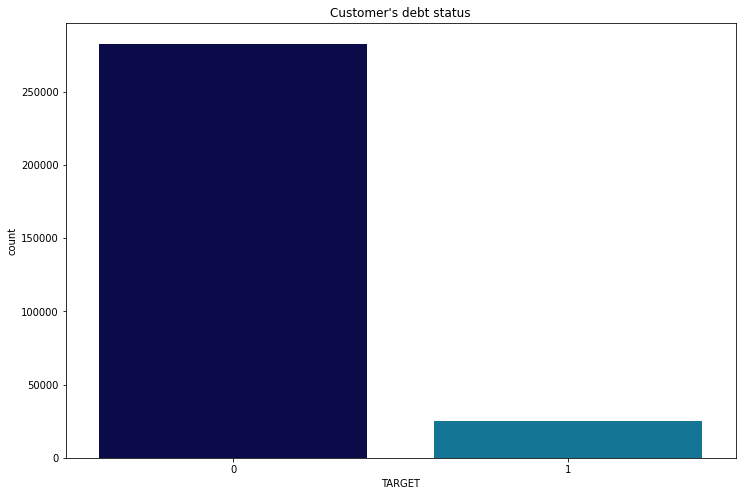

In [21]:
fig, axis1 = plt.subplots(figsize = (12,8))
sns.countplot(x = 'TARGET', data = train, ax = axis1, palette='ocean')
plt.title("Customer's debt status")

In [22]:
# temp = train["TARGET"].value_counts()
# df = pd.DataFrame({'labels': temp.index,
#                    'values': temp.values})
# df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

In [23]:
t = train['TARGET'].value_counts()
labels = t.index
values = t.values
colors = ['#304D63', 'ED8975']
pie = go.Pie(labels=labels, values=values, 
               textfont=dict(size=13),
               marker=dict(colors=colors, line=dict(color='#000000', width=1)))
layout = go.Layout(title='Loan Repayed or not', height=400)
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

1 đại diện cho số lượng khách hàng gặp khó khăn trong việc thanh toán khoản vay và chỉ có 24825 không thể chi trả được tương đương với 8.07%. Theo số liệu của NHNN năm 2021, tỷ lệ nợ xấu nội bảng đạt 1.92% còn tỷ lệ nợ xấu gồm cả nợ tiềm ẩn và cơ cấu lại đạt 7.31% do đó con số 8.07 được xem là tương đối cao so với tỷ lệ nợ xấu chung của thị trường.

##NAME_CONTRACT_TYPE

In [31]:
info_feature(train.NAME_CONTRACT_TYPE)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


Text(0.5, 1.0, 'Type of loans')

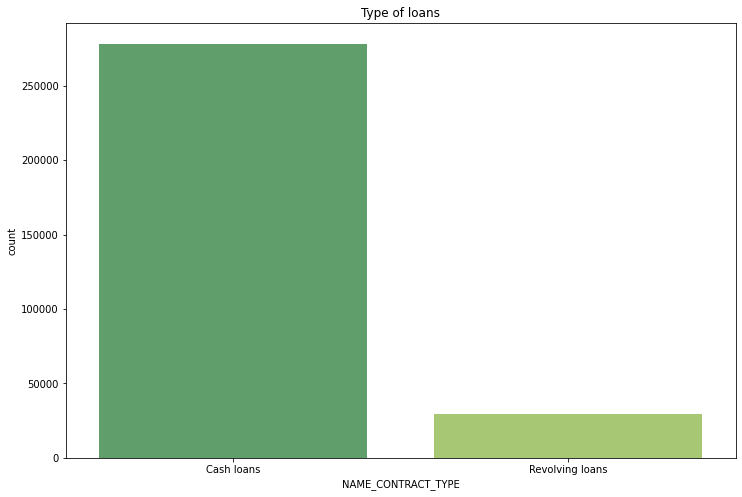

In [32]:
fig, axis1 = plt.subplots(figsize = (12,8))
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = train, ax = axis1, palette='summer')
plt.title("Type of loans")

In [33]:
t = train['NAME_CONTRACT_TYPE'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3','#96D38C']
trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Contract Type', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Số lượng các khoản vay tiền mặt là 278232, chiếm hơn 90% trong khi khoản vay quay vòng có số lượng ít hơn rất nhiều là 29279. \
=> Khách hàng thường vay bằng tiền mặt (cash loan) nhiều hơn là vay quay vòng (revolving loan) bởi vì vay tiền mặt không cần thế chấp hay bảo lãnh  

### NAME_CONTRACT_TYPE vs TARGET

In [34]:
percent_contract_type = ((pd.crosstab(index= train["NAME_CONTRACT_TYPE"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_contract_type.sort_values(1,ascending=False)

TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,91.65,8.35
Revolving loans,94.52,5.48


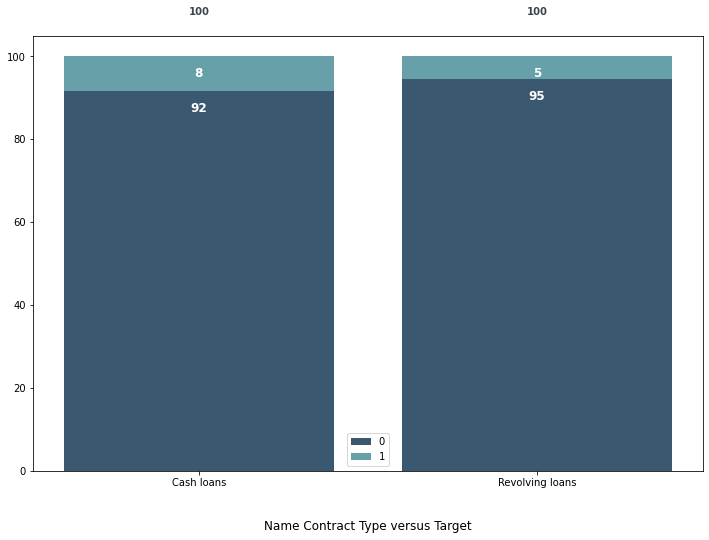

In [35]:
stacked_bar(percent_contract_type,"Name Contract Type versus Target")

Khách hàng chủ yếu đăng ký khoản vay tiền mặt vì nó thường không cần thế chấp hay phải bảo lãnh nhưng lãi suất của các khoản vay tiền mặt cao hơn so với cái khoản cho vay khác để bù cho rủi ro trả nợ. Do đó, tỷ lệ default của khách hàng khi đăng ký khoản vay tiền mặt cao hơn so với khoản vay xoay vòng là điều dễ hiểu và từ biểu đồ trên, ta thấy được tỷ lệ default ở khoản vay tiền mặt cao hơn 3% so với khoản vay xoay vòng.

## CODE_GENDER

In [26]:
info_feature(train.CODE_GENDER)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Text(0.5, 1.0, 'Gender of client')

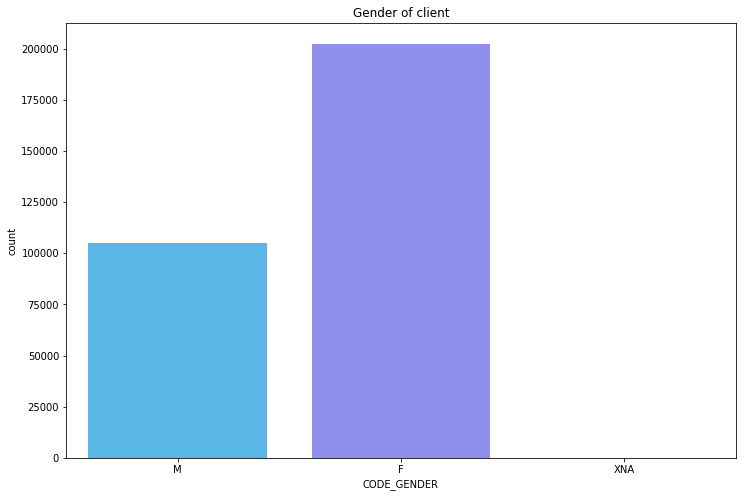

In [27]:
fig, axis1 = plt.subplots(figsize = (12,8))
sns.countplot(x = 'CODE_GENDER', data = train, ax = axis1, palette='cool')
plt.title("Gender of client")

Từ biểu đồ trên ta thấy được rằng phụ nữ đã nộp đơn xin phần lớn các khoản vay, gần như gấp đôi so với nam giới. Tổng cộng, có khoảng 202.448 đơn xin vay do nữ giới nộp, trong khi đó chỉ có 105059 đơn xin vay do nam giới nộp.

### CODE_GENDER vs TARGET

In [28]:
gender_group = pd.crosstab(index= train["CODE_GENDER"], columns= train["TARGET"], normalize= False)
gender_group

TARGET,0,1
CODE_GENDER,,
F,188278,14170
M,94404,10655
XNA,4,0


In [29]:
percent_gender = ((pd.crosstab(index= train["CODE_GENDER"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_gender.sort_values(1,ascending=False)

TARGET,0,1
CODE_GENDER,,
M,89.86,10.14
F,93.00,7.00
XNA,100.00,0.00


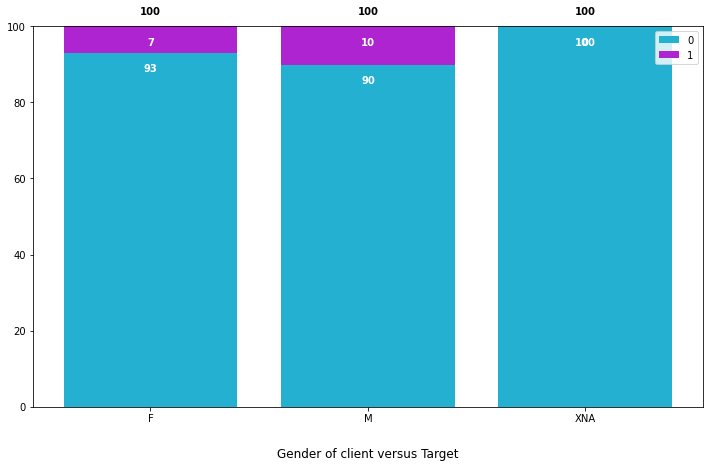

In [30]:
fig, ax = plt.subplots(figsize=(12,7))

colors = ['#24b1d1', '#ae24d1']
bottom = np.zeros(len(percent_gender))

for i, col in enumerate(percent_gender.columns):
  ax.bar(
      percent_gender.index, percent_gender[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_gender[col])

totals = percent_gender.sum(axis=1)
y_offset = 3
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -5
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=10)

ax.set_title("Gender of client versus Target", y=-0.15 )
ax.legend()

Tuy lượng hồ sơ của khách hàng nữ nộp cao gần như gấp đôi so với khách hàng nam tuy nhiên tỷ lệ default ở khách hàng nam lại cao hơn so với khách hàng nữ, cụ thể là 3%. 

## FLAG_OWN_CAR

In [36]:
info_feature(train.FLAG_OWN_CAR)

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Text(0.5, 1.0, 'Does client own Car ?')

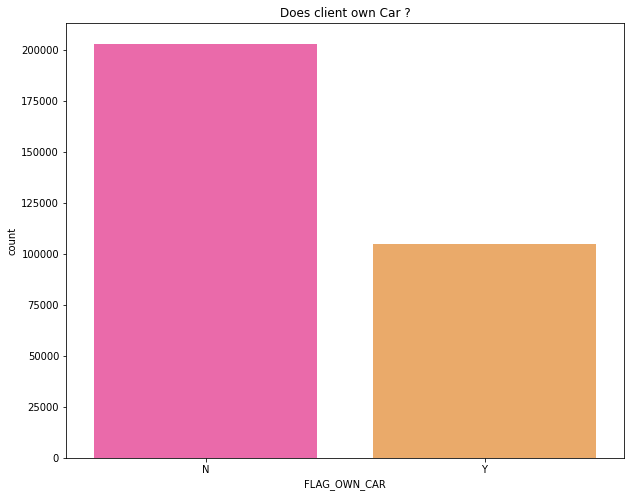

In [37]:
fig, axis1 = plt.subplots(figsize = (10,8))
sns.countplot(x = 'FLAG_OWN_CAR', data = train, ax = axis1, palette='spring')
plt.title("Does client own Car ?")

In [38]:
t = train['FLAG_OWN_CAR'].value_counts()
labels = t.index
values = t.values
pie = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Does client own car ?', height=400)
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

### FLAG_OWN_CAR vs TARGET

In [39]:
percent_own_car = ((pd.crosstab(index= train["FLAG_OWN_CAR"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_own_car.sort_values(1,ascending=False)

TARGET,0,1
FLAG_OWN_CAR,,
N,91.50,8.50
Y,92.76,7.24


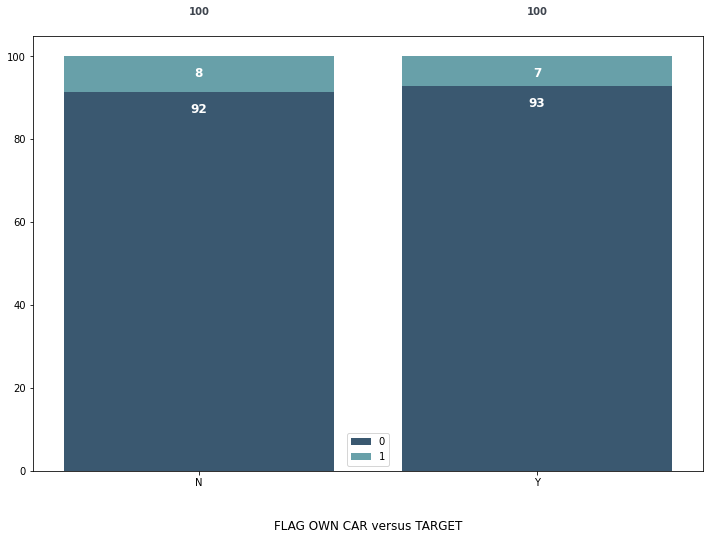

In [40]:
stacked_bar(percent_own_car, "FLAG OWN CAR versus TARGET")

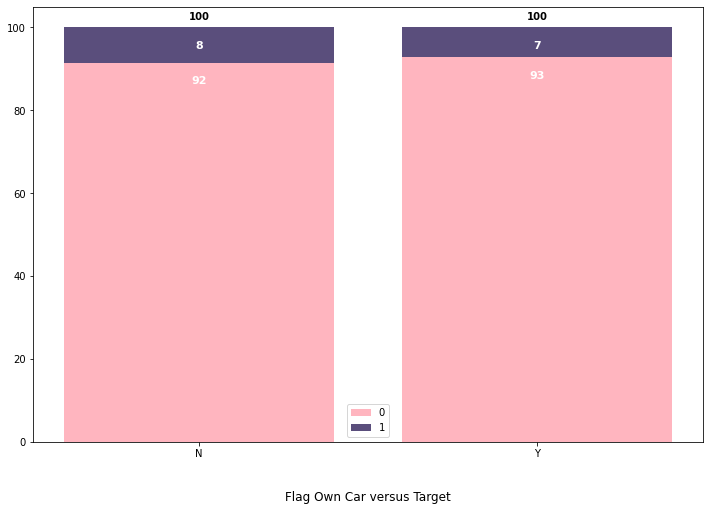

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['#FFB5BF', '#5A4E7C']
bottom = np.zeros(len(percent_own_car))

for i, col in enumerate(percent_own_car.columns):
  ax.bar(
      percent_own_car.index, percent_own_car[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_own_car[col])

totals = percent_own_car.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -5
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=11)

ax.set_title("Flag Own Car versus Target", y=-0.15 )
ax.legend()

Từ biểu đồ trên ta thấy được tỷ lệ default ở nhóm sở hữu và không sở hữu lần lượt là 7.24% và 8.5%. Mặc dù số lượng khách hàng không sở hữu ô tô gần như gấp đôi lượng khách hàng có sở hữu ô tô nhưng tỷ lệ default ở 2 nhóm khách hàng lại không có sự chênh lệch nhiều.

## FLAG_OWN_REALTY

In [42]:
info_feature(train.FLAG_OWN_REALTY)

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


Text(0.5, 1.0, 'Does client own estate ?')

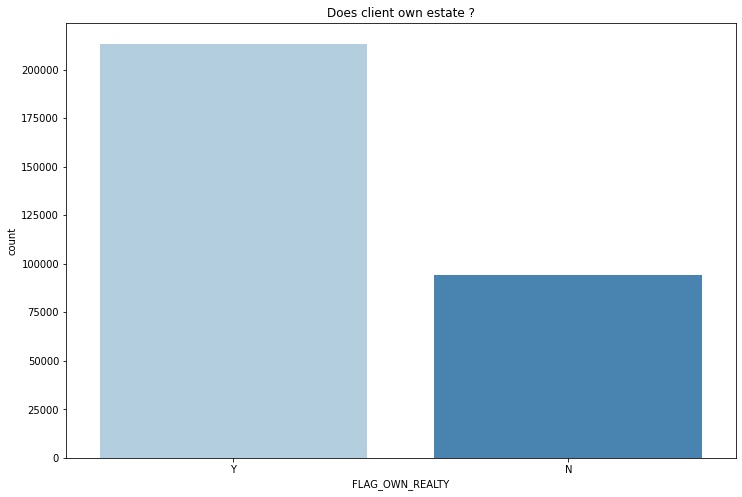

In [43]:
fig, axis1 = plt.subplots(figsize = (12,8))
sns.countplot(x = 'FLAG_OWN_REALTY', data = train, ax = axis1, palette='Blues')
plt.title("Does client own estate ?")

In [44]:

t = train['FLAG_OWN_REALTY'].value_counts()
labels = t.index
values = t.values
pie = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Does client own estate ?', height=400)
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

=> Số lượng khách hàng sở hữu bất động sản (nhà hoặc chung cư) nhiều hơn số lượng khách hàng sở hữu xe ô tô. Khoảng 70% khách hàng sở hữu bất động sản, trong khi chỉ có 34% khách hàng sở hữu xe đã nộp đơn xin vay trong những năm qua.

### FLAG_OWN_REALTY vs TARGET

In [45]:
percent_own_estate = ((pd.crosstab(index= train["FLAG_OWN_REALTY"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_own_estate.sort_values(1,ascending=False)

TARGET,0,1
FLAG_OWN_REALTY,,
N,91.68,8.32
Y,92.04,7.96


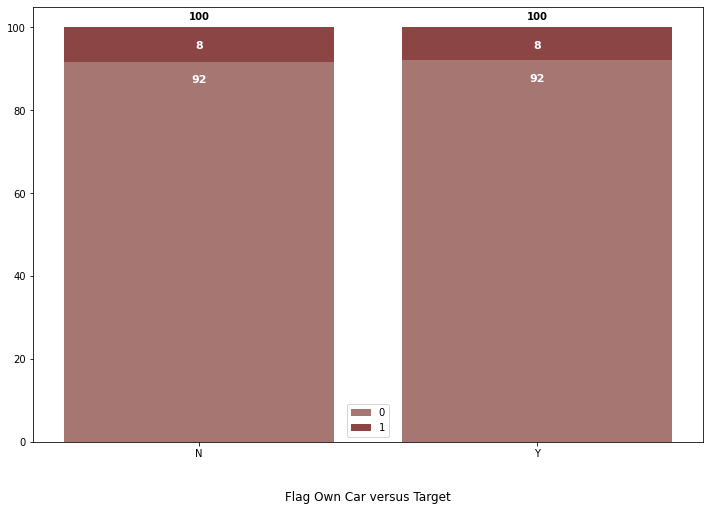

In [46]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['#A67772', '#8C4545']
bottom = np.zeros(len(percent_own_estate))

for i, col in enumerate(percent_own_estate.columns):
  ax.bar(percent_own_estate.index, percent_own_estate[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_own_estate[col])

totals = percent_own_estate.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -5
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=11)

ax.set_title("Flag Own Car versus Target", y=-0.15 )
ax.legend()

Tuy số lượng khách hàng sở hữu BĐS nhiều hơn gấp đôi lượng khách hàng không sở hữu BĐS nhưng tỷ lệ default ở nhóm khách hàng sở hữu BĐS lại thấp hơn nhóm KH chưa sở hữu BĐS . (Ở buổi đồ trên, số liệu đã được làm tròn nhưng chính xác thì nhóm KH sở hữu BĐS có tỷ lệ default là 7.96% còn nhóm chưa sở hữu BĐS thì có tỷ lệ default là 8.32%) \
=> Nguyên nhân là do các khách hàng đã có nhà hay chung cư (Bất động sản) đa phần họ đã có tài chính ổn định 

## CNT_CHILDREN

In [47]:
info_feature(train.CNT_CHILDREN)

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


In [48]:
sum(train.CNT_CHILDREN >= 7)

21

In [49]:
train['children'] = train['CNT_CHILDREN'].mask( train.CNT_CHILDREN.map(train.CNT_CHILDREN.value_counts())<4000, 3)

In [50]:
train['children'].value_counts()

0    215371
1     61119
2     26749
3      4272
Name: children, dtype: int64

Text(0.5, 1.0, "Distribution of Clients's Number of Children")

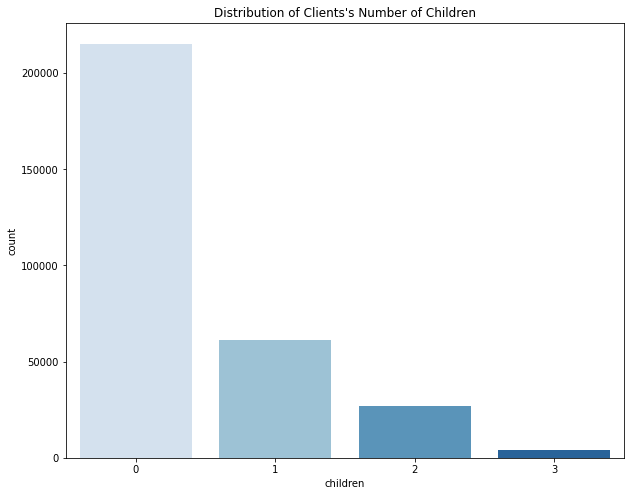

In [55]:
fig,axis1 = plt.subplots( figsize = (10,8))
sns.countplot(x = 'children', data = train, ax = axis1, palette = "Blues")
plt.title("Distribution of Clients's Number of Children")

Phần lớn các khách hàng nộp hồ sơ xin vay đều không có con với số lượng lên đến 215371. Số lượng các khách hàng có 1 con và 2 con nhỏ hơn các khách hàng không có con lần lượt là 4 lần và 8 lần. Khách hàng có 5 con trở lên hiếm hơn rất nhiều. \
=> Nguyên nhân là do đây là các cặp vợ chồng mới cưới, còn non trẻ hay có nhiều dự định, kế hoạch mà tiềm lực về tài chính chưa ổn định do đó nhu cầu vay nợ cao.

### CNT_CHILDREN vs TARGET

In [56]:
percent_children = ((pd.crosstab(index= train["children"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_children.sort_values(1,ascending=False)

TARGET,0,1
children,,
3,89.96,10.04
1,91.08,8.92
2,91.28,8.72
0,92.29,7.71


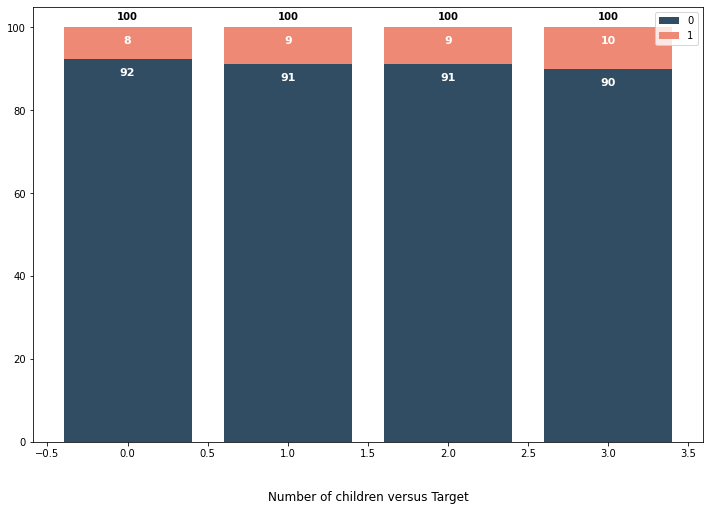

In [57]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['#304D63', '#ED8975']
bottom = np.zeros(len(percent_children))

for i, col in enumerate(percent_children.columns):
  ax.bar(percent_children.index, percent_children[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_children[col])

totals = percent_children.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -4
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=11)

ax.set_title("Number of children versus Target", y=-0.15 )
ax.legend()

Đối với việc trả nợ, các nhóm KH có từ 0 đến 3 con có tỷ lệ default trung bình (từ 8-10%) còn nhóm khách hàng từ 4 con trở lên tuy lượng hồ sơ xin vay ít nhưng tỷ lệ default ở các nhóm KH lại khá cao. Chẳng hạn như nhóm có 4 hay 6 con, tỷ lệ default lần lượt là 12.82% (13%) và 28.57% (30%). Đặc biệt nhất là nhóm KH có 9 con và 11 con khi mà tỷ lệ default là 100% 
Riêng các nhóm KH có 8,10, 12, 14,19 con, lượng hồ sơ rất hiếm cho thấy nhu cầu vay của họ rất thấp và hầu hết họ đều có năng lực về tài chính khá vững chắc khi mà tỷ lệ hoàn trả lại các khoản vay là 100%. => nhóm KH nên được ưu tiên cho vay.

### CNT_CHILDREN vs NAME_FAMILY_STATUS

In [58]:
train['CNT_CHILDREN'] = train['CNT_CHILDREN'].mask( train.CNT_CHILDREN.map(train.CNT_CHILDREN.value_counts())<100, 'Above 5')

In [59]:
info_feature(train['NAME_FAMILY_STATUS'])

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


In [60]:
percent_children_family = pd.crosstab(index= train["CNT_CHILDREN"], columns= train["NAME_FAMILY_STATUS"], normalize= False)
percent_children_family.sort_values("Married",ascending=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
CNT_CHILDREN,,,,,,
0,20947,126575,14132,38810,2,14905
1,6588,43696,4389,5578,0,868
2,1936,22496,1111,958,0,248
3,262,3190,122,85,0,58
4,33,370,12,9,0,5
Above 5,9,105,4,4,0,4


Sau khi kết hợp với biến tình trạng hôn nhân (NAME_FAMILY_STATUS) ta thấy được nhóm có nhu cầu vay chủ yếu là nhóm khách hàng đã kết hôn và không có con hoặc có từ 1 đến 2 con. \
=> Nhóm khách hàng đã kết hôn nhưng chưa có con có nhu cầu vay cao do có thể đây là các cặp vợ chồng trẻ, tài chính chưa được ổn định hoặc do có nhiều dự định, kế hoạch mong muốn được thực hiện nên mới đi vay NH.

## NAME_TYPE_SUITE (Người đi cùng khách hàng khi họ nộp đơn đăng ký)

In [61]:
info_feature(train.NAME_TYPE_SUITE)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


Text(0.5, 1.0, "Distribution of Clients's NAME_TYPE_SUITE")

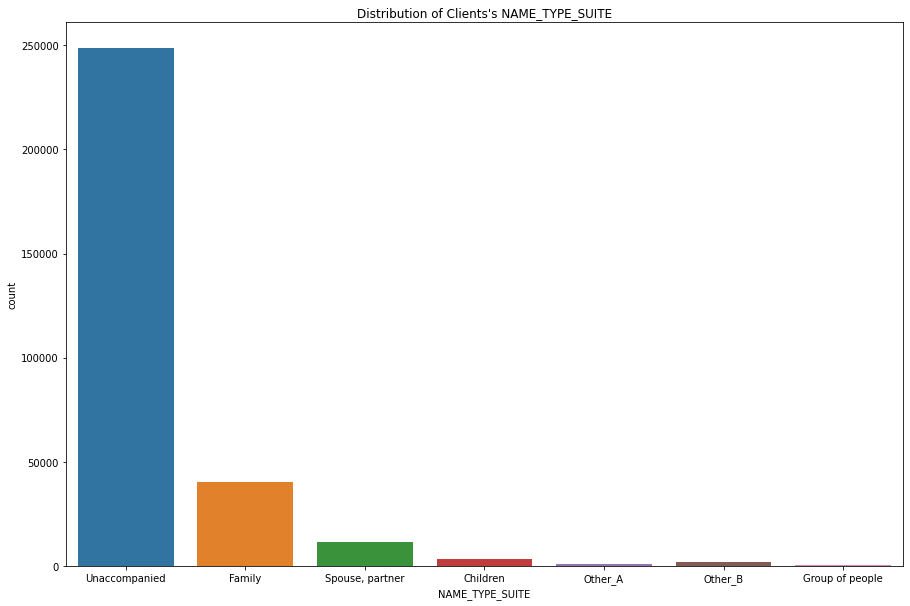

In [62]:
fig,axis1 = plt.subplots( figsize = (15,10))
sns.countplot(x = 'NAME_TYPE_SUITE', data = train, ax = axis1)
plt.title("Distribution of Clients's NAME_TYPE_SUITE")

In [63]:
tr1 = bar_hor(train, "NAME_TYPE_SUITE", "Distribution of " ,"#96D38C", w=700, lm=100, return_trace= True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Customer's Suit Type" ])
fig.append_trace(tr1, 1, 1)
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100))
iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Từ biểu đồ ta thấy rằng, hầu hết khách hàng thường đi một mình khi đăng ký khoản vay với số lượng lên đến hơn 248 nghìn khách hàng không có người đi cùng. Các khách hàng đi cùng gia đình hay cùng vợ (chồng) cũng đứng thứ 2 và 3 với số lượng lần lượt là 40149 và 11370.

### **NAME_TYPE_SUITE vs TARGET**

In [64]:
percent_suite = ((pd.crosstab(index= train["NAME_TYPE_SUITE"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_suite.sort_values(1,ascending=False)

TARGET,0,1
NAME_TYPE_SUITE,,
Other_B,90.17,9.83
Other_A,91.22,8.78
Group of people,91.51,8.49
Unaccompanied,91.82,8.18
"Spouse, partner",92.13,7.87
Family,92.51,7.49
Children,92.62,7.38


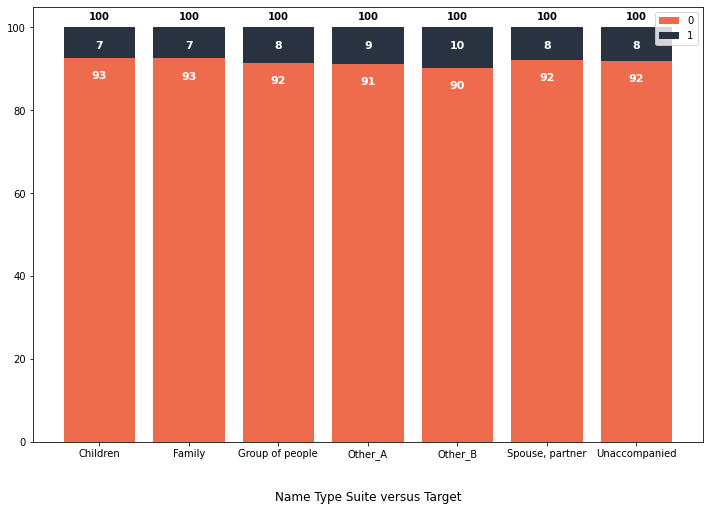

In [65]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['#ee6c4d', '#293241']
bottom = np.zeros(len(percent_suite))

for i, col in enumerate(percent_suite.columns):
  ax.bar(percent_suite.index, percent_suite[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_suite[col])

totals = percent_suite.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -5
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=11)

ax.set_title("Name Type Suite versus Target", y=-0.15 )
ax.legend()

Tuy số lượng khách hàng có người đi cùng thuộc nhóm Other A và Other_B rất ít nhưng tỷ lệ default lại cao hơn mức trung bình(từ 9-10%). Trong khi đó, số lượng khách hàng đi một mình hay đi với gia đình, vợ/chồng chiếm đa số nhưng tỷ lệ default chỉ ở mức trung bình.(từ 7-8%)
=> Feature NAME_TYPE_SUITE không ảnh hưởng gì đến việc không hoàn trả được nợ của khách hàng.

## NAME_INCOME_TYPE (Nguồn thu nhập của người nộp đơn đăng ký vay)

In [66]:
info_feature(train.NAME_INCOME_TYPE)

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


**Note:** Hình này ko nhìn được số lượng unemployed, student, businessman, maternity leave là bao nhiêu. Vì vậy có thể phải xóa đi working để hiển thị rõ hợn số lượng các title khác. 

In [67]:
tr1 = bar_hor(train, "NAME_INCOME_TYPE", "Distribution of " ,"#a4c5f9", w=700, lm=100, return_trace= True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Income Type Of Customer" ])
fig.append_trace(tr1, 1, 1)
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100))
iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [68]:
train['INCOME_TYPE'] = train['NAME_INCOME_TYPE'].mask( train.NAME_INCOME_TYPE.map(train.NAME_INCOME_TYPE.value_counts())<100, 'Others')

In [69]:
train['INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Others                      55
Name: INCOME_TYPE, dtype: int64

In [70]:
t = train['INCOME_TYPE'].value_counts()
labels = t.index
values = t.values
pie = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title="Income Type Of Customer", height=450)
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

Thu nhập của khách hàng đến từ nhiều nguồn khác nhau như: Working, Commercial associate hay Pensioner,... trong đó có đến 51.6% khách hàng có thu nhập từ Working, tiếp đó là thu nhập từ Commercial associate và Pensioner với 23.3% và 18%. 

### NAME_INCOME_TYPE vs TARGET 

In [72]:
percent_income_type = ((pd.crosstab(index= train["INCOME_TYPE"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_income_type.sort_values(1,ascending=False)

TARGET,0,1
INCOME_TYPE,,
Others,81.82,18.18
Working,90.41,9.59
Commercial associate,92.52,7.48
State servant,94.25,5.75
Pensioner,94.61,5.39


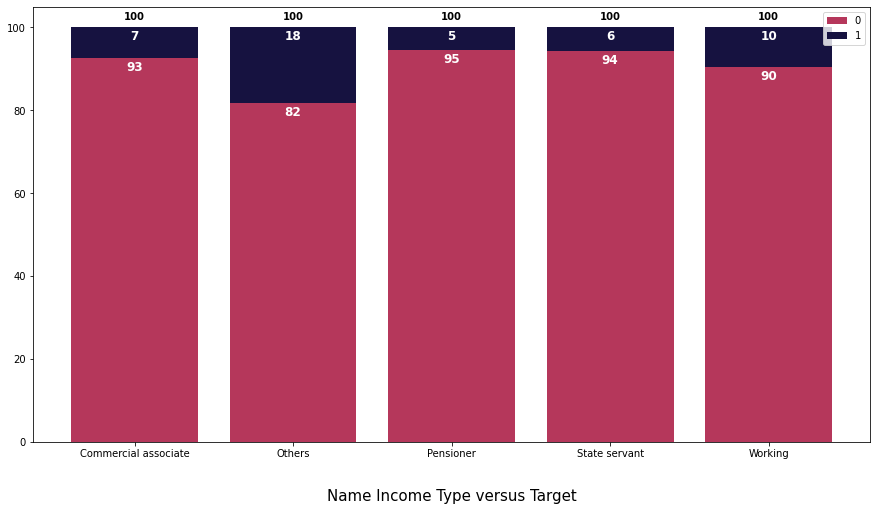

In [73]:
fig, ax = plt.subplots(figsize=(15,8))

colors = ['#b5375b', '#161240']
bottom = np.zeros(len(percent_income_type))

for i, col in enumerate(percent_income_type.columns):
  ax.bar(percent_income_type.index, percent_income_type[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_income_type[col])

totals = percent_income_type.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -3
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=12)

ax.set_title("Name Income Type versus Target", y=-0.15, size = 15 )
ax.legend()

Những người nộp đơn với loại thu nhập Nghỉ thai sản (Maternity leave) có tỷ lệ phần trăm không trả lại khoản vay là 40%, tiếp theo là nhóm Thất nghiệp (Unemployed) với 36% và nhóm Working với 10%. Các loại thu nhập còn lại thì đều có tỷ lệ default dưới mức trung bình, cụ thể từ 5-7% hoặc là 0% như nhóm Businessman hay nhóm Student. \
=> Lí do 2 nhóm này có tỷ lệ default là 0% vì nhóm Businessman là nhóm những người đã ổn định trong sự nghiệp hay thành đạt nên họ có đủ khả năng trả các khoản vay đúng kỳ hạn; còn nhóm Student thì phần lớn vẫn đang phụ thuộc vào bố mẹ do đó tỷ lệ nợ xấu thấp (0%).

## NAME_EDUCATION_TYPE

In [ ]:
info_feature(train.NAME_EDUCATION_TYPE)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


In [ ]:
tr1 = bar_hor(train, "NAME_EDUCATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Customer's Education Level" ])
fig.append_trace(tr1, 1, 1)
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100))
iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
t = train['NAME_EDUCATION_TYPE'].value_counts()
labels = t.index
values = t.values
pie = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title="Customer's Education Level", height=450)
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

Đa số khách hàng có trình độ trung học cơ sở / trung học phổ thông với 71% (hơn 218 nghìn khách hàng nộp đơn có trình độ Secondary / secondary special), tiếp đó là các khách hàng có trình độ học vấn Đại học với 24.3%. Từ biểu đồ trên, ta thấy rằng chỉ một số rất nhỏ khách hàng có bằng cấp.

### NAME_EDUCATION_TYPE vs TARGET 

In [ ]:
percent_edu_type = ((pd.crosstab(index= train["NAME_EDUCATION_TYPE"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_edu_type.sort_values(1,ascending=False)

TARGET,0,1
NAME_EDUCATION_TYPE,,
Lower secondary,89.07,10.93
Secondary / secondary special,91.06,8.94
Incomplete higher,91.52,8.48
Higher education,94.64,5.36
Academic degree,98.17,1.83


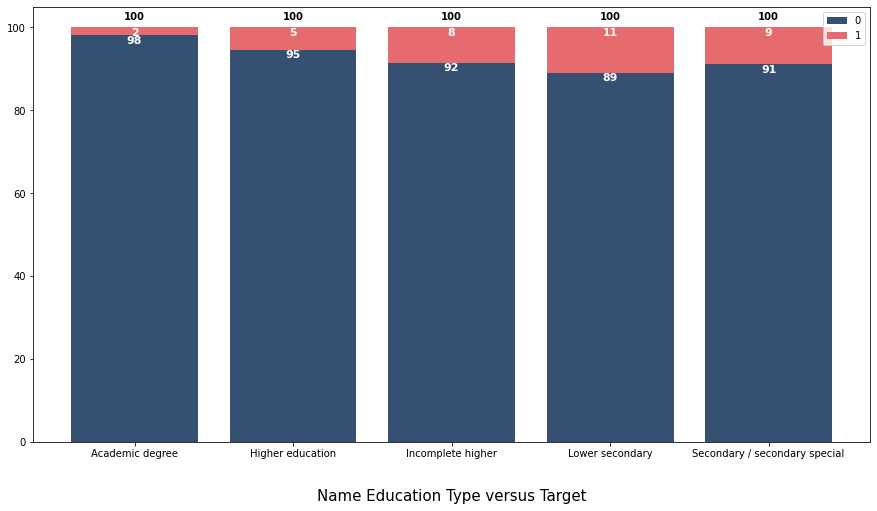

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

colors = ['#355070', '#E56B6F']
bottom = np.zeros(len(percent_edu_type))

for i, col in enumerate(percent_edu_type.columns):
  ax.bar(percent_edu_type.index, percent_edu_type[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_edu_type[col])

totals = percent_edu_type.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -2
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=11)

ax.set_title("Name Education Type versus Target", y=-0.15, size = 15 )
ax.legend()

Nhóm Lower secondary mặc dù chỉ chiếm một phần nhỏ nhưng có tỷ lệ không trả lại khoản vay lớn nhất là 11%. Trái ngược với nhóm Lower secondary, những người thuộc nhóm Academic degree có tỷ lệ không hoàn trả thấp nhất với tỷ lệ dưới 2% (chính xác là 1.83%). Còn các nhóm còn lại có tỷ lệ default trung bình từ 5-9%.

## AMT_INCOME_TOTAL

In [ ]:
info_feature(train.AMT_INCOME_TOTAL)

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



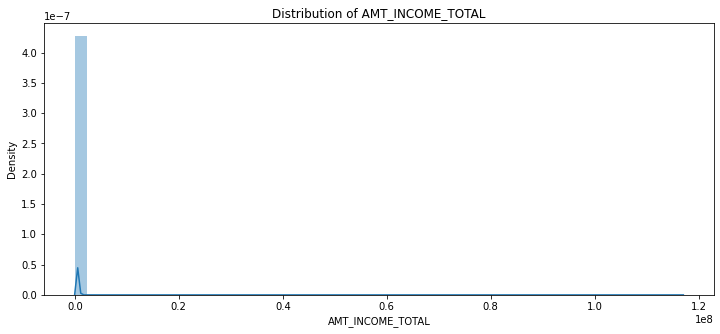

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(train["AMT_INCOME_TOTAL"])

In [ ]:
print("Max:",train.AMT_INCOME_TOTAL.max())

Max: 117000000.0


In [ ]:
print("Min:",train.AMT_INCOME_TOTAL.min())

Min: 25650.0


In [ ]:
income_data = train[['TARGET', 'AMT_INCOME_TOTAL']]
income_data['Total_income'] = pd.cut(income_data['AMT_INCOME_TOTAL'], bins = np.linspace(25650.0, 759000, num = 6),labels = ['very low','low','medium','high','very high'])
income_data['Total_income'].value_counts()
train['Total_income'] = income_data['Total_income']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train['Total_income'].value_counts()

very low     189833
low          101481
medium        13088
high           1532
very high       935
Name: Total_income, dtype: int64

Text(0.5, 1.0, 'Distribution of Total_income')

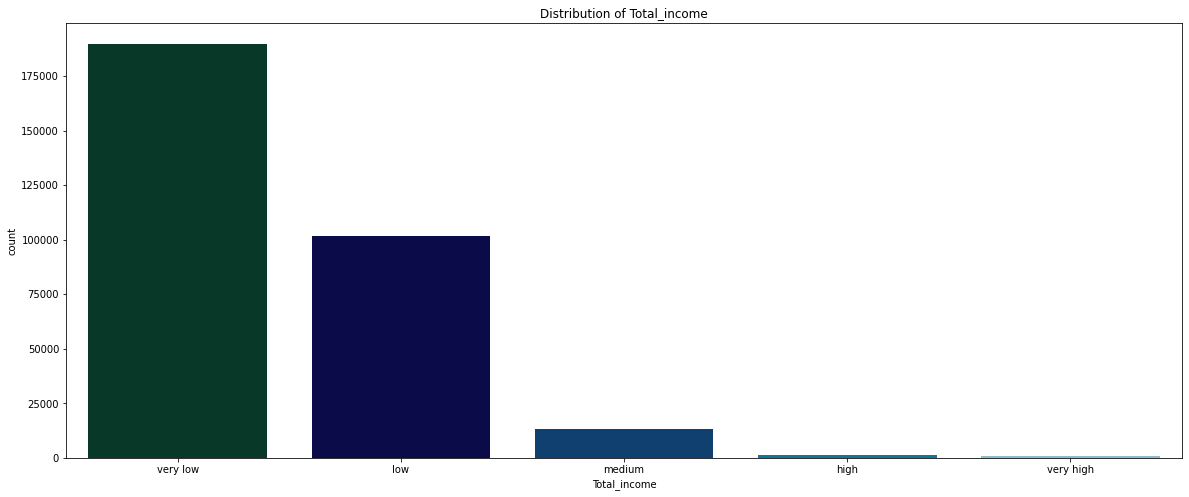

In [ ]:
fig, axis1 = plt.subplots(figsize = (20,8))
sns.countplot(x = 'Total_income', data = train, ax = axis1, palette='ocean')
plt.title("Distribution of Total_income")

Hầu hết mọi người có thu nhập rất thấp và thấp với số lượng lên đến hơn 200 nghìn. Trong khi đó, số lượng khách hàng có thu nhập cao rất ít (chỉ khoảng 935 khách hàng). Do vậy, dựa vào tổng thu nhập ta thấy được khả năng chi trả nợ không được đảm bảo và cần có các chính sách đối với nhóm người thu nhập thấp này.

In [ ]:
train_domain = train.copy()
test_domain = test.copy()

train_domain['CREDIT_INCOME_PERCENT'] = train_domain['AMT_CREDIT'] / train_domain['AMT_INCOME_TOTAL']
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_INCOME_TOTAL']
train_domain['CREDIT_TERM'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_CREDIT']
train_domain['DAYS_EMPLOYED_PERCENT'] = train_domain['DAYS_EMPLOYED'] / train_domain['DAYS_BIRTH']

In [ ]:
test_domain['CREDIT_INCOME_PERCENT'] = test_domain['AMT_CREDIT'] / test_domain['AMT_INCOME_TOTAL']
test_domain['ANNUITY_INCOME_PERCENT'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_INCOME_TOTAL']
test_domain['CREDIT_TERM'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_CREDIT']
test_domain['DAYS_EMPLOYED_PERCENT'] = test_domain['DAYS_EMPLOYED'] / test_domain['DAYS_BIRTH']

In [ ]:
train_domain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,children,INCOME_TYPE,Total_income,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0,Working,low,2.007889,0.121978,0.060749,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0,State servant,low,4.790750,0.132217,0.027598,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0,Working,very low,2.000000,0.100000,0.050000,0.011814
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0,Working,very low,2.316167,0.219900,0.094941,0.159905
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0,Working,very low,4.222222,0.179963,0.042623,0.152418


### **AMT_INCOME_TOTAL vs TARGET**

In [ ]:
percent_income = ((pd.crosstab(index= train["Total_income"], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_income.sort_values(1,ascending=False)

TARGET,0,1
Total_income,,
very low,91.53,8.47
low,92.33,7.67
high,93.93,6.07
medium,94.03,5.97
very high,95.29,4.71


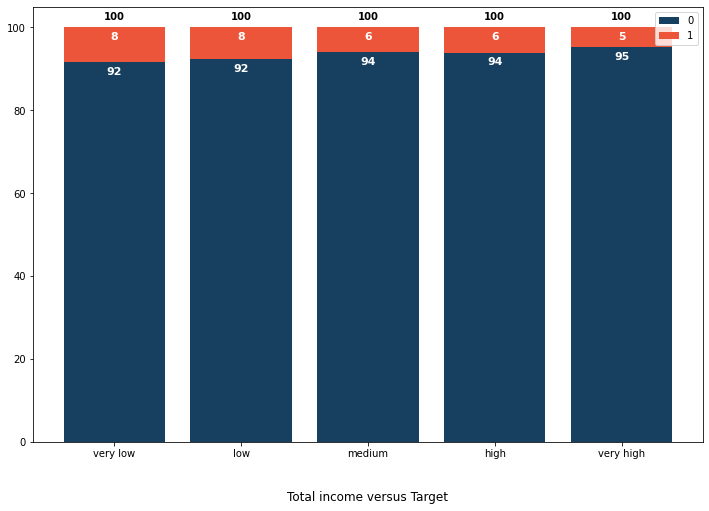

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

colors = [ '#173F5F', '#ED553B']
bottom = np.zeros(len(percent_income))

for i, col in enumerate(percent_income.columns):
  ax.bar(percent_income.index, percent_income[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_income[col])

totals = percent_income.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -3
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=11)

ax.set_title("Total income versus Target", y=-0.15 )
ax.legend()

Khách hàng có thu nhập từ medium trở lên có tỷ lệ default thấp, chỉ từ 5% đến 6%. Trong khi đó, nhóm khách hàng nộp đơn xin vay thuộc nhóm thu nhập cực thấp và thấp có tỷ lệ default cao hơn. \
=> Đây cũng là điều dễ hiểu vì nhóm người có thu nhập thấp gặp nhiều khó khăn hơn trong việc chi tiêu. Với mức sống ngày càng tăng như ngày nay thì những đồng lương ít ỏi không thể đáp ứng được do đó ngân hàng cần có các chính sách khác khi cho những nhóm người này vay.

## AMT_CREDIT

In [ ]:
info_feature(train.AMT_CREDIT)

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64


In [ ]:
print("Max:",train.AMT_CREDIT.max())

Max: 4050000.0


In [ ]:
print("Min:",train.AMT_CREDIT.min())

Min: 45000.0


In [ ]:
## Biểu đồ không biểu hiện được ý nghĩa :(
# plt.figure(figsize=(12,5))
# plt.title("Distribution of AMT_CREDIT")
# ax = sns.distplot(train["AMT_CREDIT"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



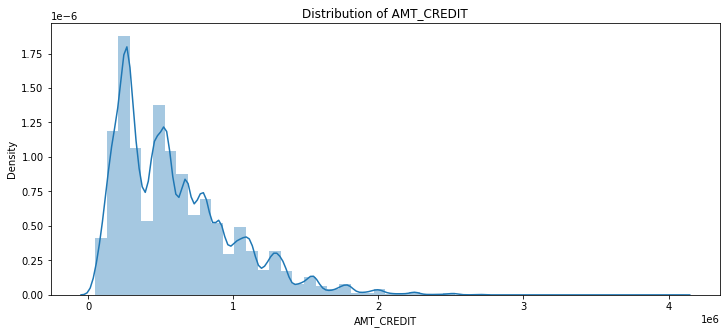

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train["AMT_CREDIT"])

In [ ]:
credit_data = train[['TARGET', 'AMT_CREDIT']]
credit_data['Credit'] = pd.cut(credit_data['AMT_CREDIT'], bins = np.linspace(45000.0, 2608200.0, num = 6),labels = ['very low','low','medium','high','very high'])
credit_data['Credit'].value_counts()
train['Credit'] = credit_data['Credit']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train['Credit'].value_counts()

very low     173463
low           92475
medium        34533
high           5541
very high      1150
Name: Credit, dtype: int64

Text(0.5, 1.0, 'Distribution of Credit')

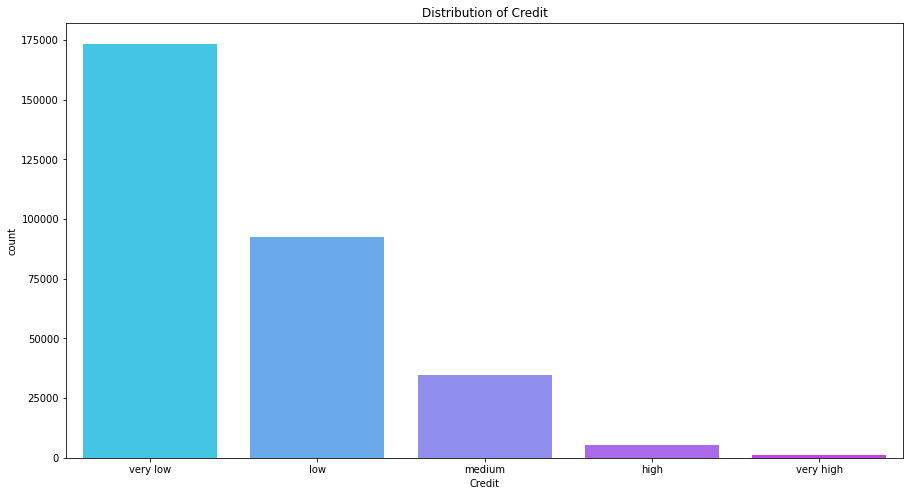

In [ ]:
fig, axis1 = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Credit', data = train, ax = axis1, palette='cool')
plt.title("Distribution of Credit")

Số tiền tín dụng của khách hàng đa số chỉ từ 45000 vì  nợ tín dụng thường có lãi khá là cao nên việc chi trả đúng hạn gây ra nhiều khó khăn cho khách hàng. Do đó, số tiền thường chỉ ở mức thấp hoặc rất thấp.

### AMT_CREDIT vs TARGET

In [ ]:
percent_credit = ((pd.crosstab(index= train['Credit'], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_credit.sort_values(1,ascending=False)

TARGET,0,1
Credit,,
very low,91.26,8.74
low,92.09,7.91
medium,94.04,5.96
high,95.45,4.55
very high,97.57,2.43


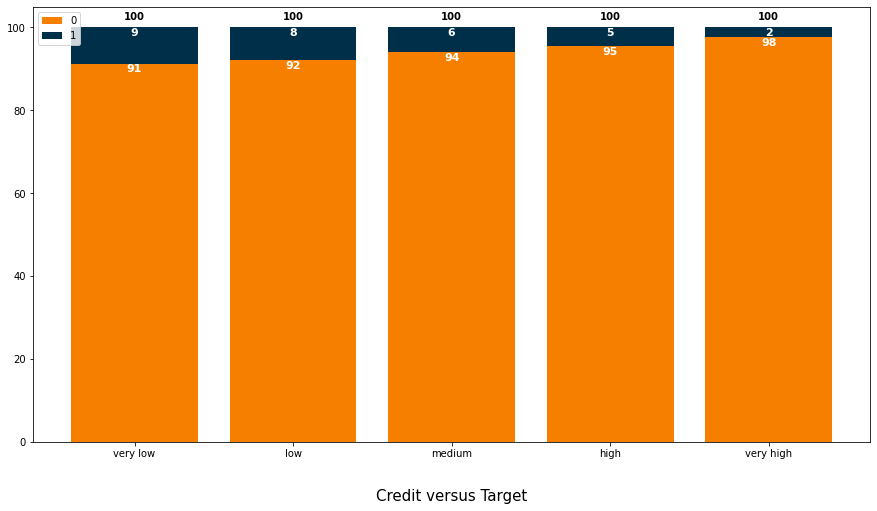

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

colors = ['#f77f00', '#003049']
bottom = np.zeros(len(percent_credit))

for i, col in enumerate(percent_credit.columns):
  ax.bar(percent_credit.index, percent_credit[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_credit[col])

totals = percent_credit.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -2
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=11)

ax.set_title("Credit versus Target", y=-0.15, size = 15 )
ax.legend()

Từ biểu đồ ta có tỷ lệ default của nhóm khách hàng có số tiền tín dụng rất thấp và thấp khá cao (8-9%) còn các nhóm còn lại thì tỷ lệ không trả được các khoản vay thấp hơn nhiều (từ 2-6%). \
Các nhóm khách hàng dù chỉ nợ tín dụng ở mức thấp nhưng khả năng không hoàn trả lại rất cao. Điều này cho thấy được nhóm khách hàng này có tài chính không ổn định và cần chú ý hơn khi cho vay.

## AMT_ANNUITY

In [ ]:
info_feature(train.AMT_ANNUITY)

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



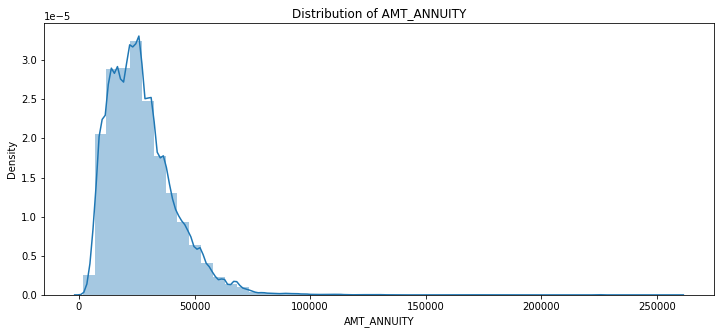

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(train["AMT_ANNUITY"])

In [ ]:
print("Max:",train.AMT_ANNUITY.max())

Max: 258025.5


In [ ]:
print("Min:",train.AMT_ANNUITY.min())

Min: 1615.5


In [ ]:
annuity = train[['TARGET', 'AMT_ANNUITY']]
annuity['Annuity_amount'] = pd.cut(annuity['AMT_ANNUITY'], bins = np.linspace(1615.5, 115446.452, num = 6) , labels = ['very low','low','medium','high','very high'])
annuity['Annuity_amount'].value_counts()
train['Annuity_amount'] = annuity['Annuity_amount']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train['Annuity_amount'].value_counts()

very low     148555
low          131070
medium        24788
high           2302
very high       554
Name: Annuity_amount, dtype: int64

Text(0.5, 1.0, 'Distribution of Annuity')

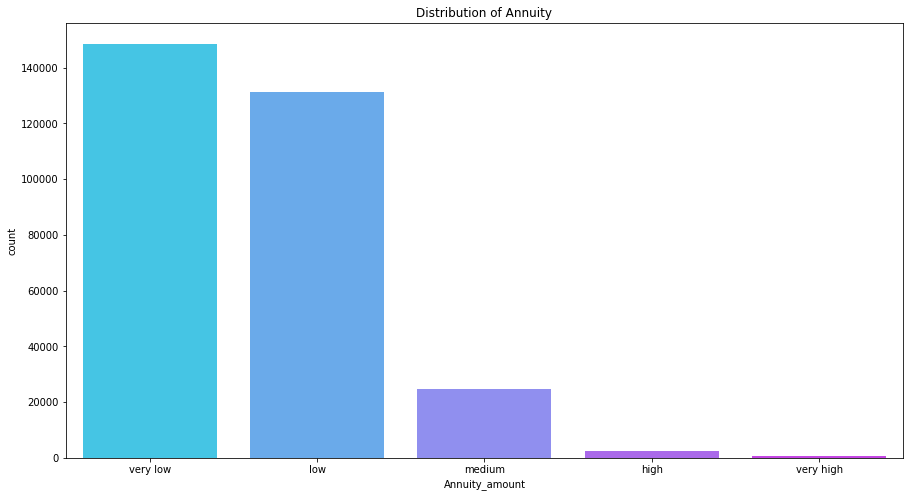

In [ ]:
fig, axis1 = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Annuity_amount', data = train, ax = axis1, palette='cool')
plt.title("Distribution of Annuity")

In [ ]:
train.Annuity_amount.value_counts()

very low     148555
low          131070
medium        24788
high           2302
very high       554
Name: Annuity_amount, dtype: int64

Hầu hết annuity amount của khách hàng nộp đơn xin vay đều chỉ ở mức rất thấp với hơn 148k và thấp với số lượng hơn 131k.   

### **AMT_ANNUITY vs TARGET**

In [ ]:
percent_annuity = ((pd.crosstab(index= train['Annuity_amount'], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_annuity.sort_values(1,ascending=False)

TARGET,0,1
Annuity_amount,,
low,91.17,8.83
very low,92.15,7.85
medium,94.07,5.93
high,95.74,4.26
very high,97.11,2.89


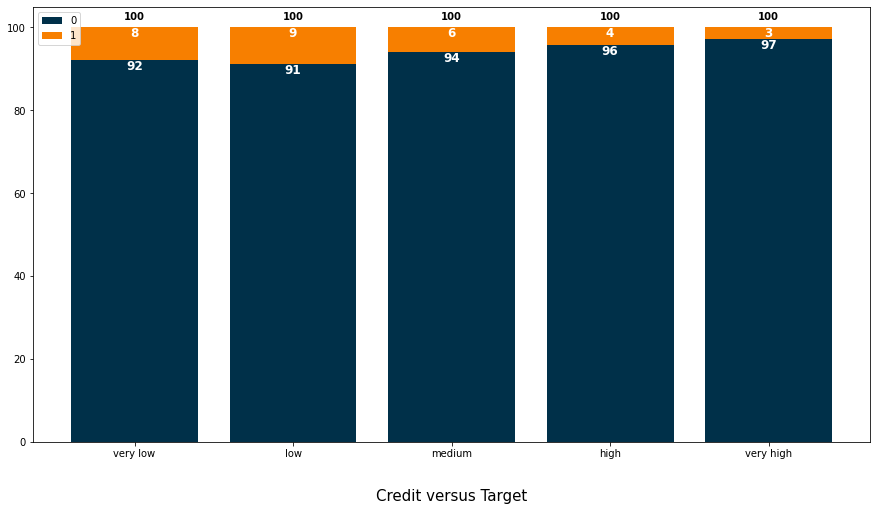

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

colors = ['#003049','#f77f00']
bottom = np.zeros(len(percent_annuity))

for i, col in enumerate(percent_annuity.columns):
  ax.bar(percent_annuity.index, percent_annuity[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_annuity[col])

totals = percent_annuity.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -2.25
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=12)

ax.set_title("Credit versus Target", y=-0.15, size = 15 )
ax.legend()

Tỷ lệ không trả được các khoản vay của nhóm khách hàng có annuity amount thấp là cao nhất với 9%, tiếp đó là đến nhóm rất thấp và trung bình. Các nhóm có annuity amount cao với rất cao thì có thể đây là các nhóm KH có tài chính ổn định hơn nên có thể trả được các khoản vay đúng hạn do đó tỷ lệ default ở nhóm này thấp hơn nhiều 2 nhóm trên.

## AMT_GOODS_PRICE (Gía sản phẩm KH muốn vay)

In [ ]:
info_feature(train.AMT_GOODS_PRICE)

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



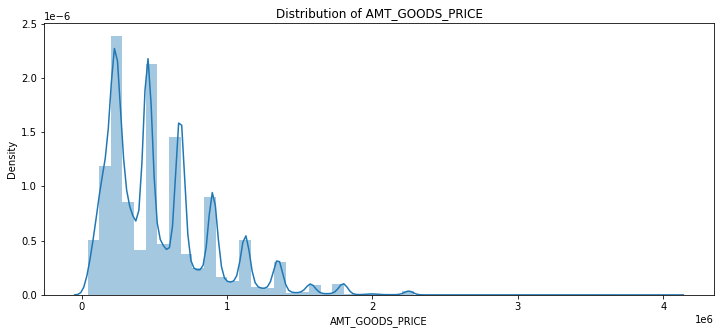

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(train["AMT_GOODS_PRICE"].dropna())

Phân phối của price of goods khá tương đồng với credit amount

In [ ]:
print("Min:",train.AMT_GOODS_PRICE.min())

Min: 40500.0


In [ ]:
print("Max:",train.AMT_GOODS_PRICE.max())

Max: 4050000.0


In [ ]:
good_price = train[['TARGET', 'AMT_GOODS_PRICE']]
good_price['Good_price'] = pd.cut(good_price['AMT_GOODS_PRICE'], bins = np.linspace(40500.0, 2400000.0, num = 6)) #, labels = ['very low','low','medium','high','very high'])
good_price['Good_price'].value_counts()
train['Good_price'] = good_price['Good_price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train.Good_price.value_counts()

(40500.0, 512400.0]       183260
(512400.0, 984300.0]       88964
(984300.0, 1456200.0]      27835
(1456200.0, 1928100.0]      5900
(1928100.0, 2400000.0]      1208
Name: Good_price, dtype: int64

Text(0.5, 1.0, 'Distribution of Good_price')

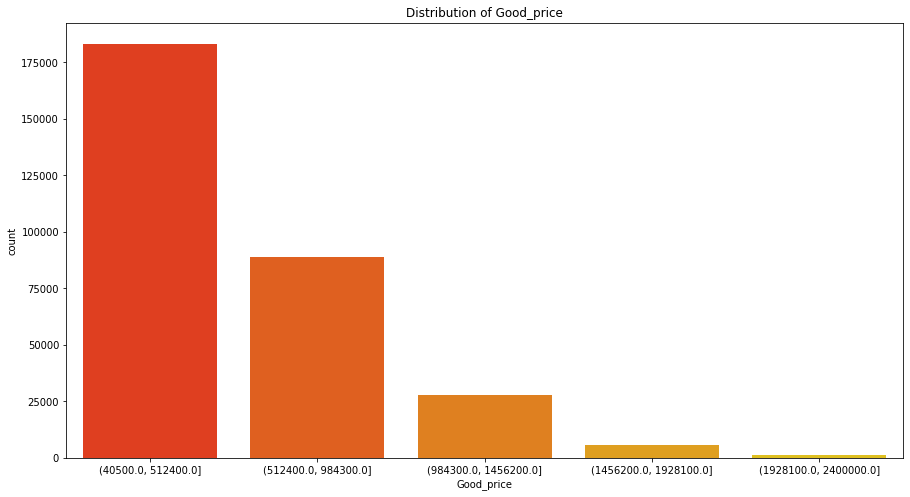

In [ ]:
fig, axis1 = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Good_price', data = good_price, ax = axis1, palette='autumn')
plt.title("Distribution of Good_price")

Hầu hết khách hàng chỉ muốn vay với giá thấp hay cực thấp. Số lượng khách hàng vay giá cực thấp là hơn 183 nghìn và giá thấp là hơn 88k. Vì hầu hết khách hàng cũng thuộc nhóm có thu nhập thấp hay chỉ có nguồn thu nhập từ Working nên chọn giá thấp là hợp lý.

###AMT_GOODS_PRICE vs TARGET

In [ ]:
percent_good_price = ((pd.crosstab(index= train['Good_price'], columns= train["TARGET"], normalize="index"))*100).round(2)
percent_good_price.sort_values(1,ascending=False)

TARGET,0,1
Good_price,,
"(40500.0, 512400.0]",90.98,9.02
"(512400.0, 984300.0]",92.69,7.31
"(984300.0, 1456200.0]",94.68,5.32
"(1456200.0, 1928100.0]",95.76,4.24
"(1928100.0, 2400000.0]",97.02,2.98


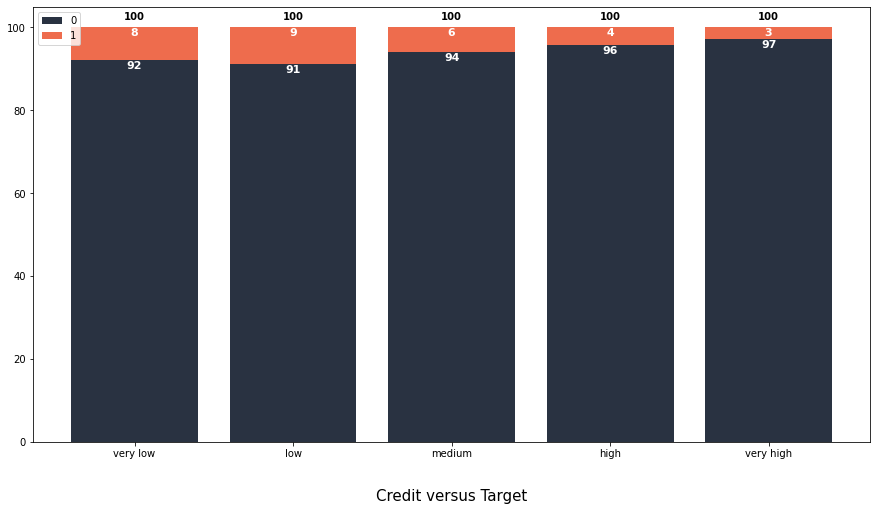

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

colors = ['#293241', '#ee6c4d']
bottom = np.zeros(len(percent_annuity))

for i, col in enumerate(percent_annuity.columns):
  ax.bar(percent_annuity.index, percent_annuity[col],
       bottom=bottom, label=col, color=colors[i])
  bottom += np.array(percent_annuity[col])

totals = percent_annuity.sum(axis=1)
y_offset = 2
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset,
          round(total),ha='center', weight='bold')

y_offset = -2
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',color='w',
          weight='bold',size=11)

ax.set_title("Credit versus Target", y=-0.15, size = 15 )
ax.legend()

Tuy chỉ vay với giá thấp nhưng khách hàng vẫn có tỷ lệ không trả được các khoản vay khá cao (9%). Ở nhóm cực thấp và nhóm trung bình, tỷ lệ default trung bình (từ 8-9%) còn nhóm cao và nhóm cực cao thì tỷ lệ default thấp hơn rất nhiều. \
=> Nhóm KH vay gói cao có khả năng hoàn trả cao hơn nhóm vay gói thấp. Nguyên nhân có thể là do nhóm Kh vay gói cao là những Kh có thu nhập và công việc ổn định nên khả năng chi trả tốt hơn.

# PREPROCESSING 

### Check for missing data

In [ ]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(10)

,Total,Percent
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
